In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
price_file = open('s&p500price', 'r')
prices_raw = price_file.readlines()

In [4]:
only_prices = []
for price in prices_raw:
    only_prices.append(price[12:])
allowed = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '.']

In [5]:
def cleanlist(listfile, allowed):
    parsedlist = []
    for item in listfile:
        tempitem = ''
        for character in item:
            if character in allowed:
                tempitem += character
        parsedlist.append(tempitem)
    return parsedlist

In [6]:
pre_parse_prices = cleanlist(only_prices, allowed)[2:]

In [7]:
prices = []
for price in pre_parse_prices:
    prices.append(float(price))

In [8]:
pe_file = open('peratio', 'r')
pe_raw = pe_file.readlines()

In [9]:
pre_parse_pe =[]
for ratio in pe_raw:
    pre_parse_pe.append(ratio[12:])

In [10]:
parsed_pe = cleanlist(pre_parse_pe, allowed)
pe = []
for ratio in parsed_pe:
    pe.append(float(ratio))

In [11]:
shorter = 0
if len(pe) < len(prices):
    shorter = len(pe)
else:
    shorter = len(prices)

In [12]:
decadereturn = []
time = 10
for i in range(shorter-12*time):
    decadereturn.append((prices[i] - prices[i+12*time])/prices[i+12*time])

earningsyield = []
for ratio in pe:
    earningsyield.append(1/ratio)

In [13]:
treasury_file = open('10yeartreasury', 'r')
treasury_raw = treasury_file.readlines()

In [14]:
pretreasury = []
for jpow in treasury_raw:
    pretreasury.append(jpow[12:])
brr = cleanlist(pretreasury, allowed)[2:-1]

In [15]:
rate = []
for powell in brr:
    rate.append(float(powell))

In [16]:
ratechange = []
for i in range(len(rate)-12*time):
    ratechange.append(rate[i]/rate[i+12*time])

In [17]:
def shortest(intlist):
    current = intlist[0]
    for i in intlist:
        if i < current:
            current = i
    return current

In [18]:
adjdecadereturn = []
for i in range(shortest([len(rate)+ 12*time, len(decadereturn)])):
               adjdecadereturn.append(decadereturn[i]/((1+rate[i - 12*time]/100)**time))

In [19]:
adjearningsyield = []
for i in range(len(earningsyield)):
    adjearningsyield.append(earningsyield[i] - rate[i]/100)

In [20]:
commonlen = shortest([len(decadereturn), len(earningsyield), len(rate), len(ratechange), len(adjdecadereturn), len(pe)])

In [21]:
pereturn = {'pe': pe[:commonlen], 'return': decadereturn, 'adjreturn': adjdecadereturn, 'ratechange': ratechange[:commonlen], 'yield': earningsyield[12*time:commonlen + 12*time], 'adjyield': adjearningsyield[12*time:commonlen + 12*time], 'rate': rate[12*time:commonlen + 12*time]}
df = pd.DataFrame(pereturn)
print(df)

         pe    return  adjreturn  ratechange     yield  adjyield  rate
0     31.29  1.976416   1.370360    0.282675  0.061920  0.029020  3.29
1     27.82  1.960230   1.356519    0.315217  0.057803  0.030203  2.76
2     24.97  1.918025   1.323481    0.311024  0.052604  0.027204  2.54
3     22.80  1.999358   1.375621    0.256604  0.052882  0.026382  2.65
4     26.42  2.119445   1.455438    0.240741  0.052882  0.025882  2.70
...     ...       ...        ...         ...       ...       ...   ...
1669  13.85  0.334052   0.234540    0.678505  0.082305  0.028805  5.35
1670  13.14  0.339869   0.238394    0.680374  0.084388  0.030888  5.35
1671  13.07  0.291322   0.204342    0.682243  0.086806  0.033306  5.35
1672  12.81  0.294363   0.206475    0.683521  0.088889  0.035489  5.34
1673  12.74  0.342495   0.240235    0.685393  0.090090  0.036690  5.34

[1674 rows x 7 columns]


In [22]:
print(df.corr())

                  pe    return  adjreturn  ratechange     yield  adjyield  \
pe          1.000000  0.193176   0.213623   -0.313303 -0.167975 -0.295622   
return      0.193176  1.000000   0.979753   -0.034800  0.366061  0.021466   
adjreturn   0.213623  0.979753   1.000000   -0.140618  0.328390 -0.022415   
ratechange -0.313303 -0.034800  -0.140618    1.000000  0.094421  0.274474   
yield      -0.167975  0.366061   0.328390    0.094421  1.000000  0.726036   
adjyield   -0.295622  0.021466  -0.022415    0.274474  0.726036  1.000000   
rate        0.225316  0.404914   0.423195   -0.282458  0.146003 -0.574285   

                rate  
pe          0.225316  
return      0.404914  
adjreturn   0.423195  
ratechange -0.282458  
yield       0.146003  
adjyield   -0.574285  
rate        1.000000  


[]

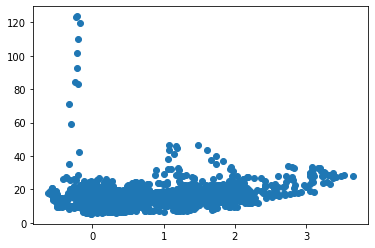

In [33]:
plt.scatter(df['return'], df['pe'])
plt.plot()

In [34]:
returntope = []
for i in range(len(df['return'])):
    returntope.append(df['return'][i]/df['yield'][i])
tempvar = 0
for i in range(len(df['return'])):
    tempvar += returntope[i]
retpe = tempvar/len(df['return'])
print(retpe)

10.853449405738413


In [37]:
expected_return = retpe*(1/42)
print(expected_return + 1)
print(())

1.2584154620413908
